In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/cleaned/final_table.csv')

df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100037,0,Cash loans,F,N,N,0,90000.0,199008.0,20893.5,...,Consumer electronics,12.0,high,Cash X-Sell: high,365243.0,-509.0,-179.0,-209.0,-203.0,0.0
1,100048,0,Cash loans,F,N,Y,0,202500.0,604152.0,29196.0,...,XNA,12.0,XNA,Cash,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0
2,100050,0,Cash loans,F,N,Y,0,108000.0,746280.0,42970.5,...,XNA,12.0,XNA,Card Street,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0
3,100059,0,Cash loans,M,Y,Y,1,540000.0,675000.0,34596.0,...,XNA,12.0,XNA,Cash,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0
4,100059,0,Cash loans,M,Y,Y,1,540000.0,675000.0,34596.0,...,XNA,12.0,XNA,Card Street,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0


In [3]:
#table info
df_dtypes_nulls = pd.DataFrame({
    'missing_bureau': df.isnull().sum(),
    'data_types_bureau': df.dtypes
})

df_dtypes_nulls

,missing_bureau,data_types_bureau
SK_ID_CURR,0,int64
TARGET,0,int64
NAME_CONTRACT_TYPE_x,0,object
CODE_GENDER,0,object
FLAG_OWN_CAR,0,object
...,...,...
DAYS_FIRST_DUE,0,float64
DAYS_LAST_DUE_1ST_VERSION,0,float64
DAYS_LAST_DUE,0,float64
DAYS_TERMINATION,0,float64


In [32]:
df.describe()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,...,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START_y,DAYS_DECISION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,AGE
count,86805.000000,86805.000000,8.680500e+04,8.680500e+04,86805.000000,86805.000000,86805.000000,86805.000000,86805.000000,86805.000000,...,86805.000000,86805.000000,86805.000000,86805.000000,86805.000000,86805.000000,86805.000000,86805.000000,86805.000000,86805.000000
mean,0.091861,0.367352,1.814628e+05,5.490840e+05,0.020731,-16781.547860,82573.263718,-5032.603410,-3161.655861,0.768458,...,115795.234330,12.003018,-353.257393,33716.749715,-8905.437152,-8888.025632,-4658.162341,-4447.091907,-8834.874673,46.473037
std,0.288831,0.693601,9.192487e+04,3.557912e+05,0.013516,4304.218082,155130.727068,3644.598295,1482.619565,0.421820,...,29139.621344,3.238317,294.831667,120388.608568,4101.357982,3065.800145,40197.352445,41165.390017,3208.560058,11.794334
min,0.000000,0.000000,2.700000e+04,4.500000e+04,0.000533,-25201.000000,-16365.000000,-22701.000000,-6383.000000,0.000000,...,0.000000,0.000000,-2897.000000,-10000.000000,-10000.000000,-10000.000000,-10000.000000,-10000.000000,-10000.000000,22.000000
25%,0.000000,0.000000,1.215000e+05,2.736360e+05,0.010032,-20570.000000,-2866.000000,-7622.000000,-4411.000000,1.000000,...,112320.000000,10.000000,-406.000000,-10000.000000,-10000.000000,-10000.000000,-10000.000000,-10000.000000,-10000.000000,37.000000
50%,0.000000,0.000000,1.575000e+05,4.851900e+05,0.018850,-16675.000000,-1253.000000,-4504.000000,-3448.000000,1.000000,...,112320.000000,12.000000,-296.000000,-10000.000000,-10000.000000,-10000.000000,-10000.000000,-10000.000000,-10000.000000,46.000000
75%,0.000000,1.000000,2.250000e+05,7.363305e+05,0.028663,-13197.000000,-160.000000,-1879.000000,-2001.000000,1.000000,...,112320.000000,14.000000,-191.000000,-10000.000000,-10000.000000,-10000.000000,-10000.000000,-10000.000000,-10000.000000,57.000000
max,1.000000,12.000000,6.750000e+06,3.150000e+06,0.072508,-7903.000000,365243.000000,0.000000,0.000000,1.000000,...,331650.000000,23.000000,-2.000000,365243.000000,365243.000000,356.000000,365243.000000,365243.000000,1.000000,70.000000


Clients % with payment difficulty: 0.9081389320891654


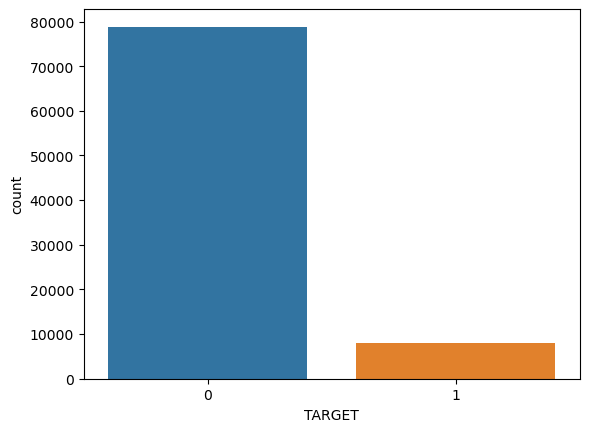

In [4]:
#plotting proportion of 1s and 0s on TARGET column
sns.countplot(data=df,x='TARGET')
target_0 = df.query('TARGET==0').TARGET.count()/df.shape[0]
print(f'Clients % with payment difficulty: {target_0}')
plt.show()

## Correlation

In [5]:
numeric_columns = df.select_dtypes(exclude=['object'])
categorical_columns = df.select_dtypes(include=['object'])

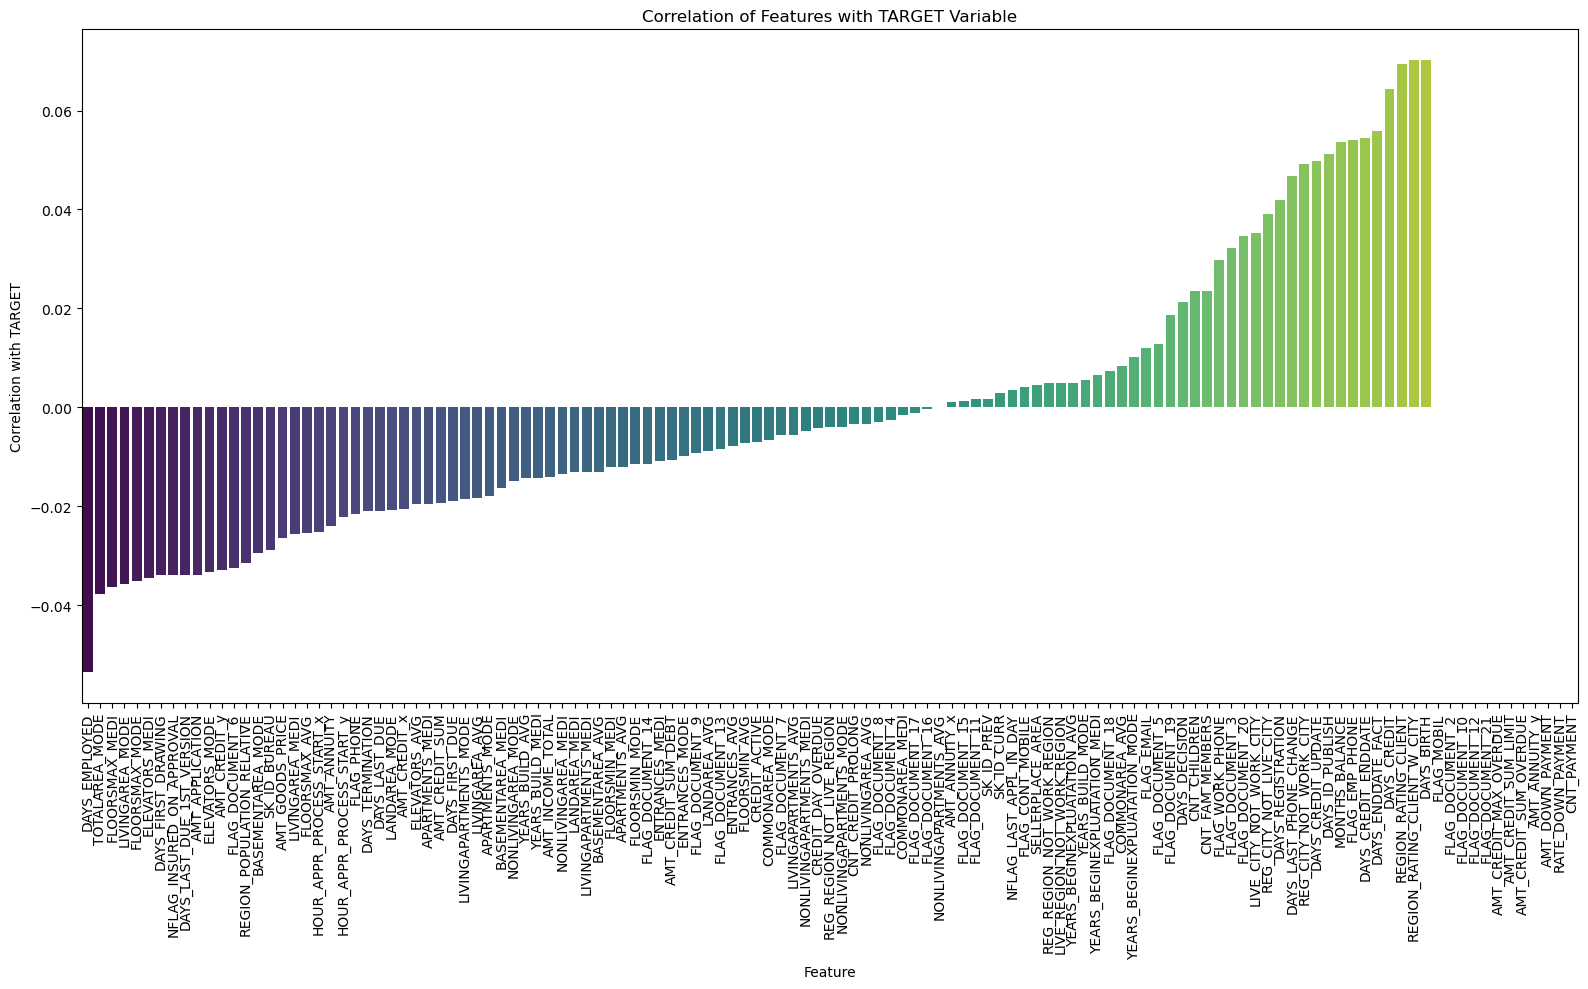

In [6]:
#correlation matrix regarting TARGET (numeric_columns)
correlation_matrix = numeric_columns.corr()

correlation_with_target = correlation_matrix['TARGET']

sorted_correlation = correlation_with_target.drop('TARGET').sort_values()

plt.figure(figsize=(16, 10))
sns.barplot(x=sorted_correlation.index, y=sorted_correlation.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Correlation with TARGET')
plt.title('Correlation of Features with TARGET Variable')
plt.tight_layout()
plt.show()

In [7]:
#printing out correlation values
correlation_matrix = numeric_columns.corr()
correlation_with_target = correlation_matrix['TARGET']

sorted_correlation = correlation_with_target.abs().sort_values(ascending=False)

sorted_correlation

TARGET                         1.000000
DAYS_BIRTH                     0.070220
REGION_RATING_CLIENT_W_CITY    0.070176
REGION_RATING_CLIENT           0.069443
DAYS_CREDIT                    0.064252
                                 ...   
AMT_CREDIT_SUM_OVERDUE              NaN
AMT_ANNUITY_y                       NaN
AMT_DOWN_PAYMENT                    NaN
RATE_DOWN_PAYMENT                   NaN
CNT_PAYMENT                         NaN
Name: TARGET, Length: 124, dtype: float64

In [8]:
#dropping columns with "no impact"values
columns_to_drop = sorted_correlation[(sorted_correlation.isnull()) | (sorted_correlation < 0.001)].index
df = df.drop(columns=columns_to_drop)

In [9]:
numeric_columns = numeric_columns.drop(columns=columns_to_drop)

In [10]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100037,0,Cash loans,F,N,N,0,90000.0,199008.0,20893.5,...,2000,Consumer electronics,high,Cash X-Sell: high,365243.0,-509.0,-179.0,-209.0,-203.0,0.0
1,100048,0,Cash loans,F,N,Y,0,202500.0,604152.0,29196.0,...,-1,XNA,XNA,Cash,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0
2,100050,0,Cash loans,F,N,Y,0,108000.0,746280.0,42970.5,...,-1,XNA,XNA,Card Street,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0
3,100059,0,Cash loans,M,Y,Y,1,540000.0,675000.0,34596.0,...,-1,XNA,XNA,Cash,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0
4,100059,0,Cash loans,M,Y,Y,1,540000.0,675000.0,34596.0,...,-1,XNA,XNA,Card Street,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0


In [11]:
df.shape

(86805, 142)

## Hypothesis Testing

In [12]:
#hypothesis tests (chi-square for categorical data; t-test for numerical data)
from scipy.stats import chi2_contingency, ttest_ind

df_new = pd.read_csv('data/cleaned/final_table.csv')

def chi_square_test(data, col_name):
    contingency_table = pd.crosstab(data['TARGET'], data[col_name])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print("\nHypothesis: Chi-square Test")
    print("Chi-square value:", chi2)
    print("p-value:", p)
    if p < 0.05:
        print("Result: Reject null hypothesis (H0)")
    else:
        print("Result: Fail to reject null hypothesis (H0)")
        
def t_test(data, col_name):
    default_group = data[data['TARGET'] == 1][col_name]
    non_default_group = data[data['TARGET'] == 0][col_name]
    t_stat, p_val = ttest_ind(default_group, non_default_group)
    print("\nHypothesis: Independent Samples t-test")
    print("t-statistic:", t_stat)
    print("p-value:", p_val)
    if p_val < 0.05:
        print("Result: Reject null hypothesis (H0)")
    else:
        print("Result: Fail to reject null hypothesis (H0)")

#implementing hypothesis tests for each single column (test)     
chi_square_test(df_new, 'EMERGENCYSTATE_MODE')
chi_square_test(df_new, 'NAME_FAMILY_STATUS')
t_test(df_new, 'NONLIVINGAREA_AVG')
t_test(df_new, 'FLAG_EMAIL')


Hypothesis: Chi-square Test
Chi-square value: 0.9907221484331086
p-value: 0.3195659391446298
Result: Fail to reject null hypothesis (H0)

Hypothesis: Chi-square Test
Chi-square value: 93.77313183125123
p-value: 2.0779583627266982e-19
Result: Reject null hypothesis (H0)

Hypothesis: Independent Samples t-test
t-statistic: -0.9824185193959453
p-value: 0.3258964445404623
Result: Fail to reject null hypothesis (H0)

Hypothesis: Independent Samples t-test
t-statistic: 3.5262428974092734
p-value: 0.0004217173934031845
Result: Reject null hypothesis (H0)


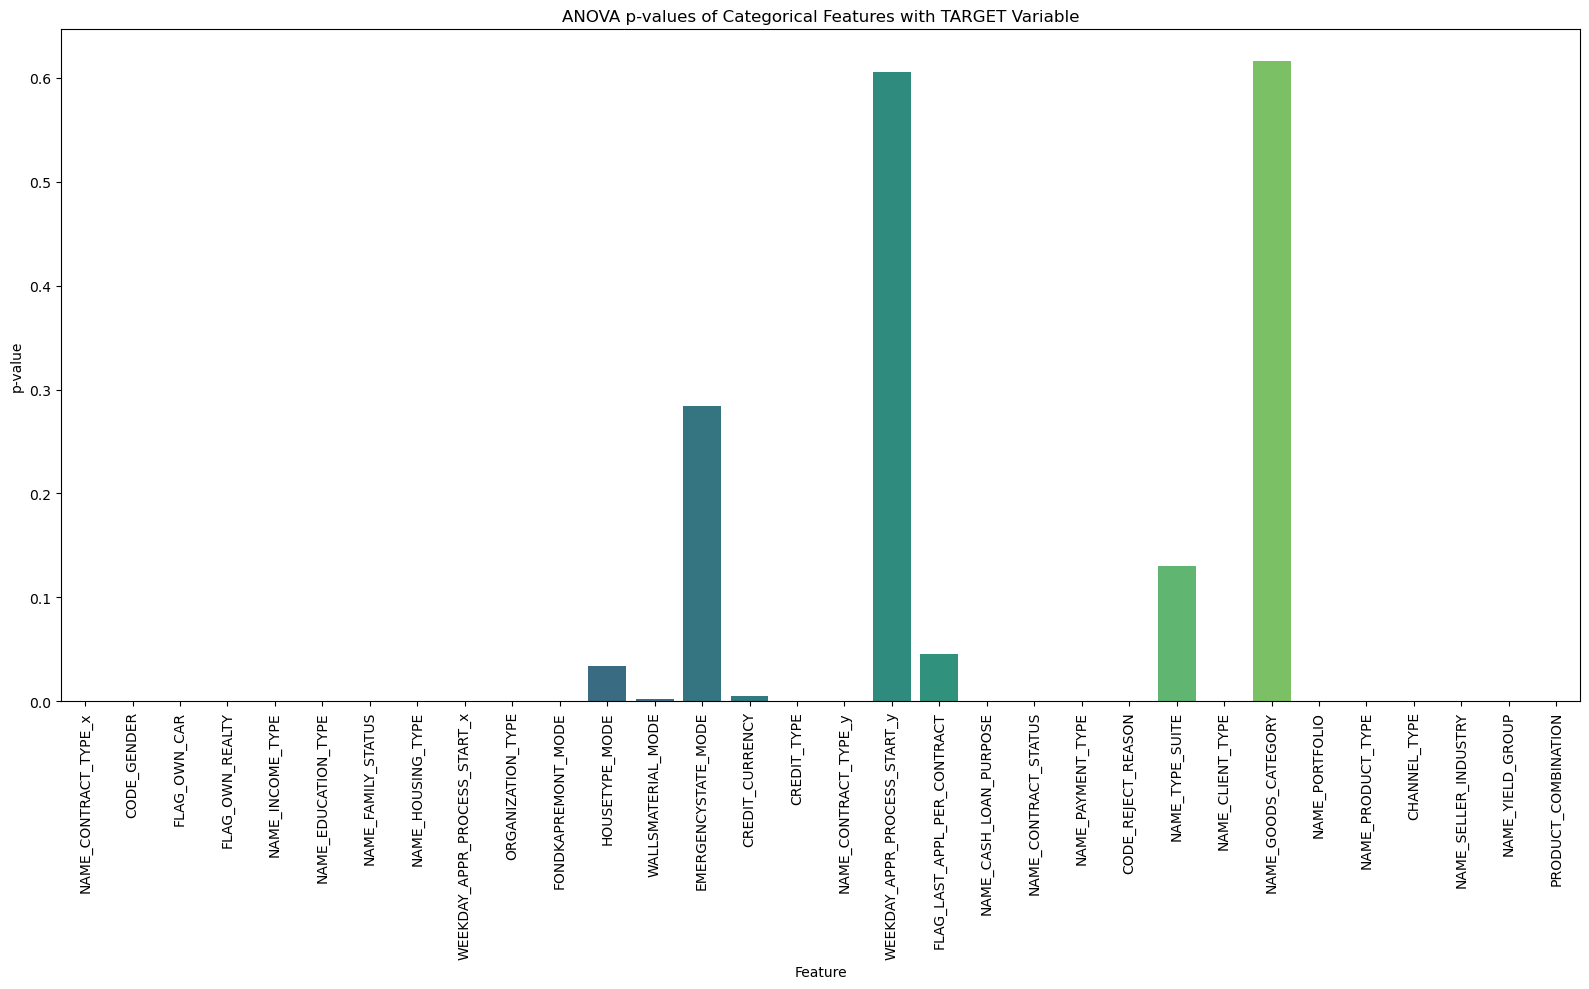

In [13]:
#hypothesis testing (calculating p values for every categorical data)
from scipy.stats import f_oneway

cat_correlation = {}
for col in categorical_columns:
    groups = df.groupby(col)['TARGET'].apply(list)
    f, p = f_oneway(*groups)
    cat_correlation[col] = p

cat_correlation_series = pd.Series(cat_correlation)

plt.figure(figsize=(16, 10))
sns.barplot(x=cat_correlation_series.index, y=cat_correlation_series.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('p-value')
plt.title('ANOVA p-values of Categorical Features with TARGET Variable')
plt.tight_layout()
plt.show()

In [14]:
cat_correlation_series

NAME_CONTRACT_TYPE_x             3.334701e-07
CODE_GENDER                      1.510999e-43
FLAG_OWN_CAR                     2.120303e-05
FLAG_OWN_REALTY                  2.991568e-10
NAME_INCOME_TYPE                 1.154263e-82
NAME_EDUCATION_TYPE              7.651031e-39
NAME_FAMILY_STATUS               2.031325e-19
NAME_HOUSING_TYPE                2.380600e-32
WEEKDAY_APPR_PROCESS_START_x     5.553915e-04
ORGANIZATION_TYPE               3.454003e-104
FONDKAPREMONT_MODE               7.672990e-15
HOUSETYPE_MODE                   3.405585e-02
WALLSMATERIAL_MODE               2.523676e-03
EMERGENCYSTATE_MODE              2.840182e-01
CREDIT_CURRENCY                  5.556806e-03
CREDIT_TYPE                      6.684841e-42
NAME_CONTRACT_TYPE_y             1.074866e-05
WEEKDAY_APPR_PROCESS_START_y     6.056469e-01
FLAG_LAST_APPL_PER_CONTRACT      4.567209e-02
NAME_CASH_LOAN_PURPOSE           6.342770e-08
NAME_CONTRACT_STATUS             2.549826e-81
NAME_PAYMENT_TYPE                4

In [15]:
#dropping columns on which "failed to reject H0"
for col in categorical_columns:
    if cat_correlation[col] > 0.05:  
        df = df.drop(columns=[col])

In [25]:
#printing out columns with the least p values ("mostly impacting values")
cat_min_p = cat_correlation_series.nsmallest(3)

for col, p_value in cat_min_p.items():
    print(f"Column: {col}, p-value: {p_value}")

Column: ORGANIZATION_TYPE, p-value: 3.4540029178652765e-104
Column: NAME_INCOME_TYPE, p-value: 1.1542634183881303e-82
Column: NAME_CONTRACT_STATUS, p-value: 2.549826374476197e-81


In [16]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100037,0,Cash loans,F,N,N,0,90000.0,199008.0,20893.5,...,2000,Consumer electronics,high,Cash X-Sell: high,365243.0,-509.0,-179.0,-209.0,-203.0,0.0
1,100048,0,Cash loans,F,N,Y,0,202500.0,604152.0,29196.0,...,-1,XNA,XNA,Cash,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0
2,100050,0,Cash loans,F,N,Y,0,108000.0,746280.0,42970.5,...,-1,XNA,XNA,Card Street,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0
3,100059,0,Cash loans,M,Y,Y,1,540000.0,675000.0,34596.0,...,-1,XNA,XNA,Cash,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0
4,100059,0,Cash loans,M,Y,Y,1,540000.0,675000.0,34596.0,...,-1,XNA,XNA,Card Street,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0


In [17]:
df.shape

(86805, 138)

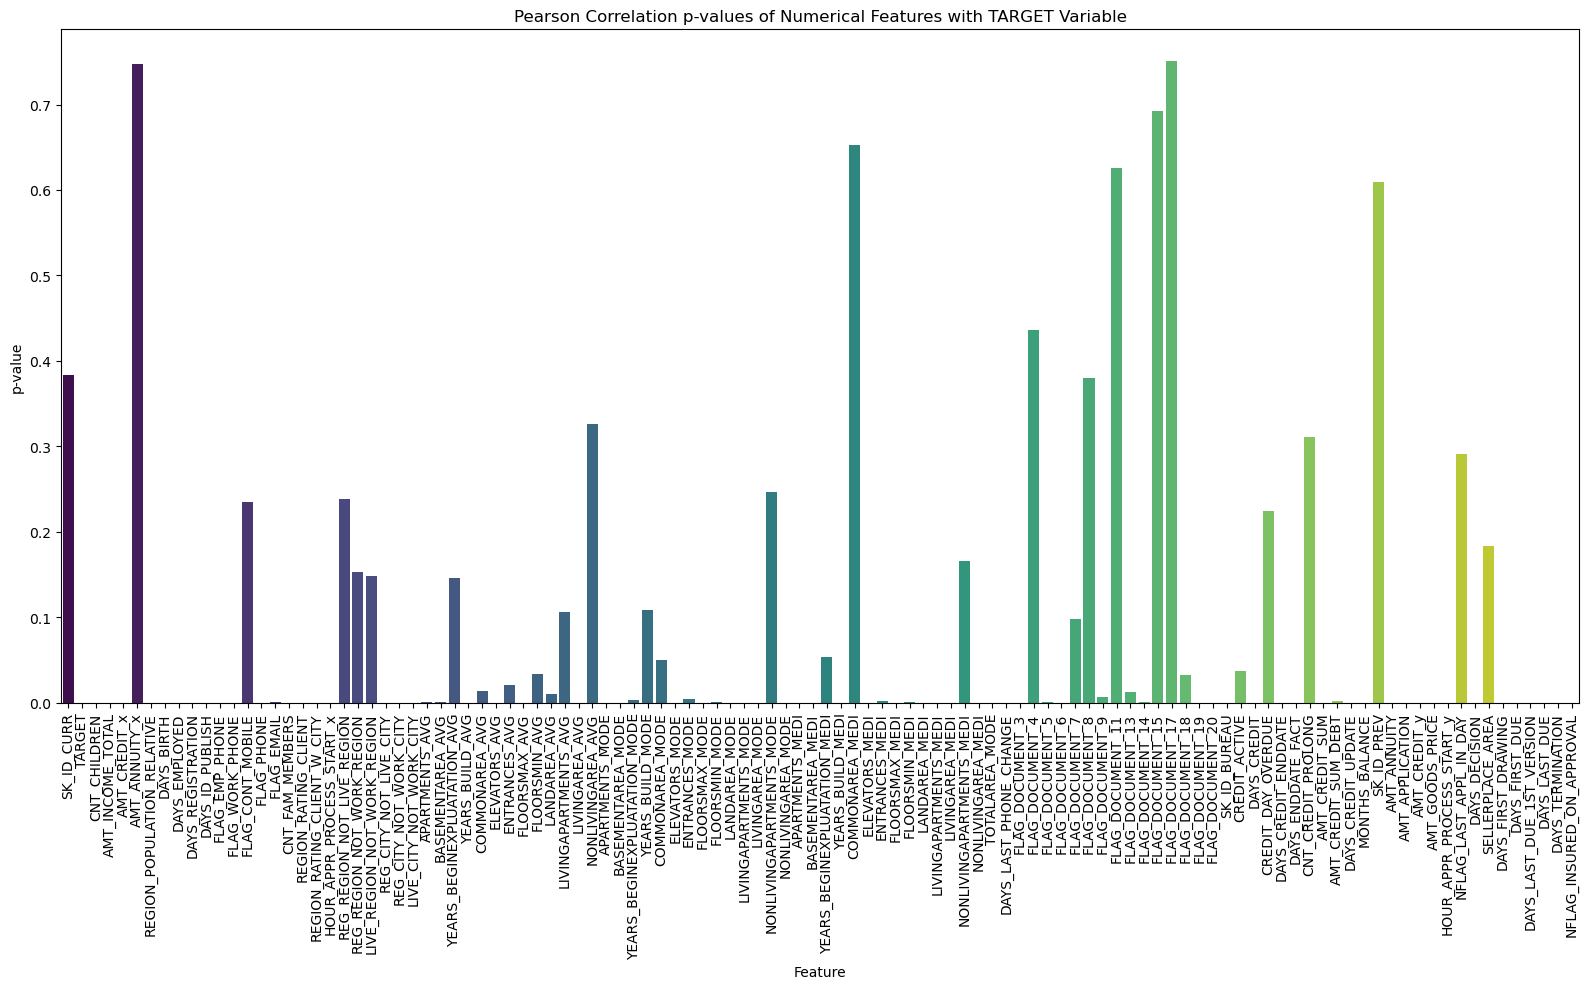

In [18]:
#hypothesis testing (calculating p values for every numerical data)
from scipy.stats import pearsonr

num_correlation = {}
for col in numeric_columns:
    r, p = pearsonr(df[col], df['TARGET'])
    num_correlation[col] = p

num_correlation_series = pd.Series(num_correlation)

plt.figure(figsize=(16, 10))
sns.barplot(x=num_correlation_series.index, y=num_correlation_series.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('p-value')
plt.title('Pearson Correlation p-values of Numerical Features with TARGET Variable')
plt.tight_layout()
plt.show()

In [19]:
#dropping columns on which "failed to reject H0"
for col in num_correlation:
    if num_correlation[col] > 0.05:  
        df = df.drop(columns=[col])

In [27]:
#printing out columns with the least p values ("mostly impacting values")
num_min_p = num_correlation_series.nsmallest(4)

for col, p_value in num_min_p.items():
    print(f"Column: {col}, p-value: {p_value}")

Column: TARGET, p-value: 0.0
Column: DAYS_BIRTH, p-value: 2.587179820171589e-95
Column: REGION_RATING_CLIENT_W_CITY, p-value: 3.3982832500107455e-95
Column: REGION_RATING_CLIENT, p-value: 2.9693711991066e-93


In [20]:
df.head()

,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,0,Cash loans,F,N,N,0,90000.0,199008.0,Working,Secondary / secondary special,...,Country-wide,Consumer electronics,high,Cash X-Sell: high,365243.0,-509.0,-179.0,-209.0,-203.0,0.0
1,0,Cash loans,F,N,Y,0,202500.0,604152.0,Working,Secondary / secondary special,...,Credit and cash offices,XNA,XNA,Cash,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0
2,0,Cash loans,F,N,Y,0,108000.0,746280.0,Pensioner,Higher education,...,Credit and cash offices,XNA,XNA,Card Street,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0
3,0,Cash loans,M,Y,Y,1,540000.0,675000.0,Commercial associate,Higher education,...,Credit and cash offices,XNA,XNA,Cash,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0
4,0,Cash loans,M,Y,Y,1,540000.0,675000.0,Commercial associate,Higher education,...,Credit and cash offices,XNA,XNA,Card Street,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0


In [21]:
df.shape

(86805, 112)

# Hypothesis:

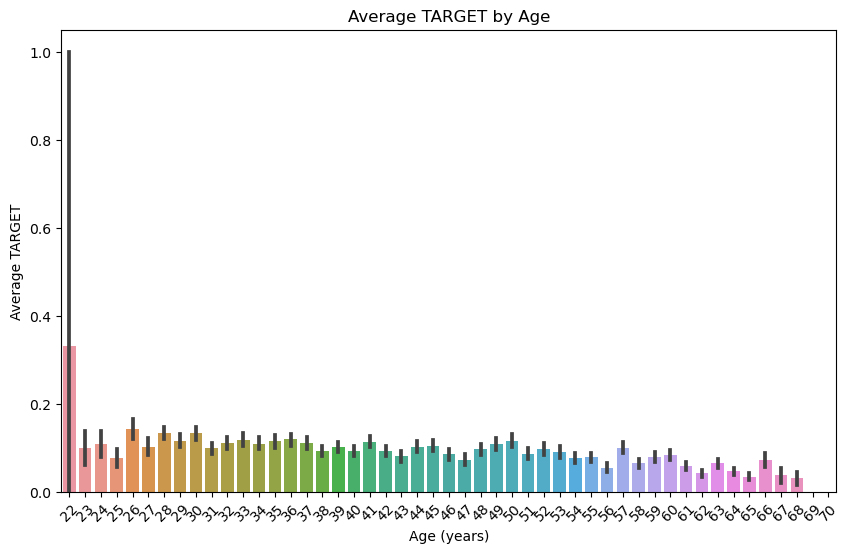

In [31]:
#plotting TARGET-AGE graph (average targer value for each age category)
df['AGE'] = -(df['DAYS_BIRTH'] // 365)

plt.figure(figsize=(10, 6))
sns.barplot(x='AGE', y='TARGET', data=df, estimator=lambda x: sum(x) / len(x))
plt.xlabel('Age (years)')
plt.ylabel('Average TARGET')
plt.xticks(rotation=45)
plt.title('Average TARGET by Age')
plt.show()

### Client's organization type, age and living city are the aspects which mostly impacts on client's difficulties facing while paying the credit

In [22]:
#saving table into csv
df.to_csv('data/cleaned/filtered_table.csv', index=False)